<a href="https://colab.research.google.com/github/dutt2022/Coursera-Data-science-Projects/blob/main/a_Concrete_Data_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
concrete_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intro-to-KERAS/concrete_data.csv', encoding='ISO-8859-1')

In [ ]:
#sns.pairplot(concrete_df)

In [ ]:
concrete_df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
#X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
X = concrete_df.drop(['Strength'], axis = 1)


In [ ]:
Y=concrete_df['Strength']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=42)

In [ ]:

input_shape=X_train.shape[1]

In [ ]:
X_train.shape[0]

721

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
def regression_model():
  model = Sequential()
  model.add(Dense(10,  activation='relu',input_dim=8,input_shape=(X_train.shape[1],)))

  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(optimizer='adam', loss='mean_squared_error',metrics='mse')
  return model
  model.summary()


In [ ]:
model = regression_model()

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=50,  verbose=2, validation_split=0.3)

Epoch 1/50
16/16 - 2s - loss: 369.3050 - mse: 369.3050 - val_loss: 247.3584 - val_mse: 247.3584 - 2s/epoch - 112ms/step
Epoch 2/50
16/16 - 0s - loss: 316.1449 - mse: 316.1449 - val_loss: 216.9031 - val_mse: 216.9031 - 113ms/epoch - 7ms/step
Epoch 3/50
16/16 - 0s - loss: 287.8229 - mse: 287.8229 - val_loss: 207.8530 - val_mse: 207.8530 - 138ms/epoch - 9ms/step
Epoch 4/50
16/16 - 0s - loss: 271.0262 - mse: 271.0262 - val_loss: 199.5203 - val_mse: 199.5203 - 118ms/epoch - 7ms/step
Epoch 5/50
16/16 - 0s - loss: 257.7123 - mse: 257.7123 - val_loss: 191.3030 - val_mse: 191.3030 - 90ms/epoch - 6ms/step
Epoch 6/50
16/16 - 0s - loss: 246.6251 - mse: 246.6251 - val_loss: 185.9424 - val_mse: 185.9424 - 138ms/epoch - 9ms/step
Epoch 7/50
16/16 - 0s - loss: 236.3931 - mse: 236.3931 - val_loss: 178.6656 - val_mse: 178.6656 - 137ms/epoch - 9ms/step
Epoch 8/50
16/16 - 0s - loss: 224.7415 - mse: 224.7415 - val_loss: 176.9557 - val_mse: 176.9557 - 100ms/epoch - 6ms/step
Epoch 9/50
16/16 - 0s - loss: 218.

In [ ]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


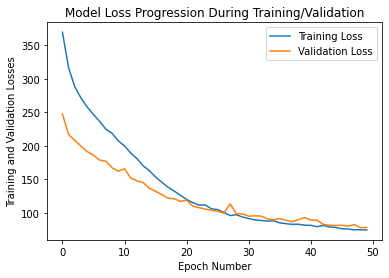

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

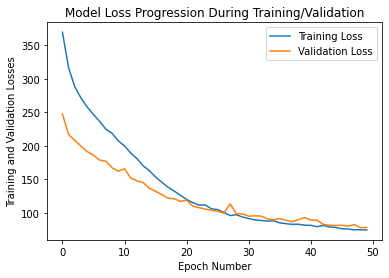

In [ ]:
plt.plot(epochs_hist.history['mse'])
plt.plot(epochs_hist.history['val_mse'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from keras.losses import mean_squared_error

In [ ]:
result = np.sqrt(mean_squared_error(y_test,y_pred))
result

array([20.04476 , 20.973509, 30.356995, 20.352982, 19.47733 , 17.80897 ,
       17.709044, 23.43035 , 18.267084, 16.731668, 17.636591, 24.216494,
       30.918196, 21.615543, 18.632586, 17.51174 , 16.44928 , 18.764404,
       16.470688, 17.744219, 16.570353, 17.328213, 17.909311, 20.483147,
       17.480743, 16.758179, 29.671656, 17.354872, 21.969154, 21.171402,
       16.473845, 16.449593, 25.052208, 23.299515, 18.954987, 16.468481,
       18.435488, 17.201965, 23.521208, 17.907618, 23.155983, 27.180315,
       17.332205, 22.09312 , 23.857561, 31.001457, 23.127846, 16.472591,
       20.076199, 24.451643, 18.411499, 19.998997, 16.455273, 17.418623,
       22.251532, 20.772379, 20.090408, 27.776093, 16.9256  , 23.659718,
       17.151752, 20.769537, 18.118433, 22.957987, 19.174856, 21.380505,
       16.457478, 24.2344  , 16.842682, 19.747349, 23.776253, 21.760796,
       27.920082, 17.651194, 17.6598  , 24.069607, 18.702469, 23.689085,
       34.071987, 23.236155, 24.902138, 19.680662, 

In [ ]:
from keras.losses import mean_squared_error

Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors

In [ ]:
MSE_List = []
for i in range(50):
    #1-Split Data:
     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
     model = regression_model()
    #2-Train:
     model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #Prediction:
     y_pred = model.predict(X_test)
    # y_pred = np.argmax(model.predict(X_test),axis=-1)
    # y_test=np.argmax(y_test)
    #3-Evaluate_Model:
     result = np.sqrt(mean_squared_error(y_test,y_pred))
    
     print("{}: sqrt(mse) = {}". format(i+1,result))
     MSE_List.append(result)
     print("***_________________________________***\n\n\n")

1: sqrt(mse) = [24.465961 21.128012 25.084965 20.865038 23.483673 18.545336 17.029367
 16.500904 20.733412 18.124144 18.873901 20.535307 29.330938 20.501831
 17.31516  17.71183  16.639875 16.841942 16.911497 16.739914 16.564014
 19.370087 16.46545  17.685442 16.869467 18.165865 28.68344  16.761595
 16.956583 19.101715 16.48308  16.45277  18.42474  17.212704 16.978386
 16.620285 20.776821 17.8161   21.117262 17.012362 21.293283 25.76141
 16.651228 20.732496 20.193647 25.87764  22.423557 19.240053 20.583588
 19.513275 19.48641  17.295023 16.782791 16.712301 20.818487 21.84196
 21.770895 25.548073 18.573063 23.700718 17.784086 19.958906 16.466246
 23.040321 17.749712 20.78565  16.450367 25.587605 18.70664  17.951303
 24.107634 21.095951 27.386515 18.897337 17.090796 23.041674 24.62844
 16.512447 33.004208 19.543062 18.732218 18.679533 16.477413 18.125448
 31.405052 20.865038 16.487034 17.243948 19.11092  19.474361 17.356657
 27.3909   22.033375 20.22977  19.334717 22.050688 19.49002  18.2

A. Results
Report mean square MSE and std square MSE

In [ ]:
# Calculate the mean and the standard deviation of the metric on the 50 samplings
mean_sqmse_A = np.mean(MSE_List)
std_sqmse_A  = np.std(MSE_List)

# Generate a data frame to store the results of the differents parts of this project
df_results = pd.DataFrame.from_dict({"Part": ["A"],"mean_sq_mse": [mean_sqmse_A], "std_sq_mse": [std_sqmse_A]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,20.033855,4.129378
